<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week08/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The famous Kaggle Titance machine learning competition

## Imports

In [72]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Load the data

In [40]:
# Kaggle splits the data into training and test sets.
train_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQmV95zo_tq3ZDwm38K551MkeT12FH82lySdVXt2cFOmYtVgAaZOqFY2xxCREwIuM8OyB8JCo3UgqJE/pub?output=csv'
df_train = pd.read_csv(train_url, index_col = 'PassengerId')
test_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQLHlapKdl0n9_oxFD5LZNWsqU633NLqbFxbjsmEA3BvYd0kV76n6ycn_8o9hbef34B8wmXvpv7pnJG/pub?output=csv'
df_test = pd.read_csv(test_url, index_col = 'PassengerId')
display(df_train.head())
df_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data exploration

### Check for duplicates

In [41]:
# Check for duplicates
print('Duplicates:', df_train.duplicated().sum())

Duplicates: 0


### Select features

In [42]:
# Make a list of columns to drop. These will be features
# that we don't expect to be predictive of whether someone
# survived the Titanic.
drop_cols = ['Name',
             'Ticket',
             'Embarked',
             'Cabin']

In [43]:
# Drop the features from the test and training data
df_train.drop(columns = drop_cols, inplace = True)
df_test.drop(columns = drop_cols, inplace = True)

# Make sure the columns were dropped
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 22.9+ KB


### Check for missing values

In [44]:
# Check for missing values
print('Missing Values in traning set:', df_train.isna().sum().sum())
print('Missing Values in test set:', df_test.isna().sum().sum())

Missing Values in traning set: 177
Missing Values in test set: 87


In [45]:
# Explore the missing values more carefully
print(df_train.isna().sum())
print()
print(df_test.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [65]:
# Get the descriptive stats of the age column
print('Training Set Stats')
print(df_train['Age'].describe())
print()
print('Test Set Stats')
print(df_test['Age'].describe())

Training Set Stats
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Test Set Stats
count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64


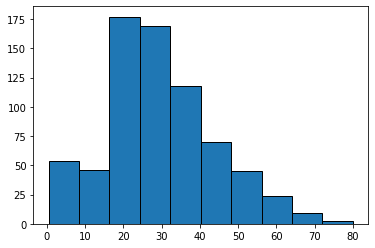

In [47]:
# Get a histogram of the age column in the training set
df_train['Age'].hist(grid = False,
                     edgecolor = 'k')

> The ages in the training set seem to skew right so we will impute the missing ages with the median.

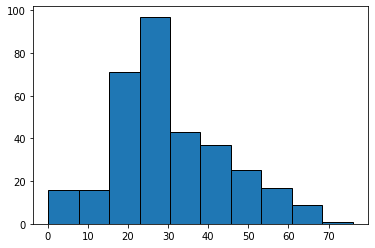

In [48]:
# Get a histogram of the age column in the test set.
df_test['Age'].hist(grid = False,
                    edgecolor = 'k')

> It seems the most reasonable thing to do is impute the test set with the same strategy.

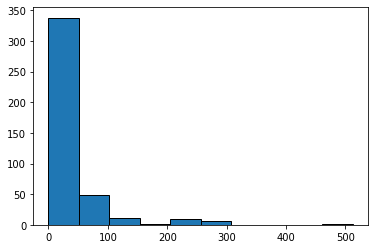

In [49]:
# Get a histogram of the fare column in the test set
df_test['Fare'].hist(grid = False, edgecolor = 'k')

In [50]:
# Get descriptive statistics of the fare column in the test set
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

> We will impute the missing fare with the median.

In [51]:
# Impute the missing fare in the test set
med_fare = df_test['Fare'].median()
df_test['Fare'].fillna(med_fare, inplace = True)

# Make sure the value was imputed
df_test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       0
dtype: int64

In [52]:
# The data was already split for this competition so we can
# impute manually without worrying about data leakage.
med_train = df_train['Age'].median()
med_test = df_test['Age'].median()
df_train['Age'].fillna(med_train, inplace = True)
df_test['Age'].fillna(med_test, inplace = True)

# Make sure the values were imputed
print(df_train.isna().sum())
print(df_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


### Set the features and target and encode the gender column

In [53]:
# Set the features and target
X_train = df_train.drop(columns = 'Survived')
y_train = df_train['Survived']

In [54]:
# Manually encode the gender column
# in the train and test sets. 
X_train['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
df_test['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

## Model Construction

### LogisticRegression

In [55]:
# Make a default logistic regression model
logreg = make_pipeline(StandardScaler(), LogisticRegression())
# Fit the model
logreg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [63]:
# Evaluate the logistic regression model
logreg_train_pred = logreg.predict(X_train)
print(classification_report(y_train, logreg_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.74      0.71      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



### K-nearest neighbors

In [68]:
# Make a default KNN model
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [71]:
# Evaluate the KNN model
knn_train_pred = knn_pipe.predict(X_train)
print(classification_report(y_train, knn_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       549
           1       0.84      0.80      0.82       342

    accuracy                           0.86       891
   macro avg       0.86      0.85      0.85       891
weighted avg       0.86      0.86      0.86       891



### Random forest

In [73]:
# Make a default random forest model
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
# Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [75]:
# Evalue the random forest model
rf_train_pred = rf_pipe.predict(X_train)
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.98      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



## Final model

So far, the default random forest has scored the best. We will construct a submission to Kaggle using the default random forest. If we are not happy with the score than we will split the train set from Kaggle into a training set and testing set so we can get a better sense of the model performance.

In [77]:
# Make the final model
final_model = rf_pipe

In [79]:
# Construct the submission
predictions = final_model.predict(df_test)

In [97]:
# Make the csv file
submission = pd.DataFrame(predictions, index = df_test.index, columns = ['Survived'])
submission.to_csv('/content/drive/MyDrive/Coding Dojo/08 Week 4: Boosting/sumbission.csv')